# Réaliser une analyse univariée en Python

## Qu'est-ce que l'analyse univariée ?

En statistiques, on a souvent besoin d'analyser des volumes de données variés. Avant de plonger dans les modèles et autres techniques complexes, il est nécessaire de bien comprendre son jeu de données. Pour cela, on utilise l'analyse univarée. L'analyse univariée permet de :

- décrire l'individu moyen d'un jeu de données.
- Identifier la distribution de la ou des variables à analyser.
- Comparer les individus entre eux, par rapport à l'individu moyen.

Cette étape intervient à la suite du nettoyage, avec succès, de la table (éliminer les doublons, imputer des valeurs etc). C'est une étape nécessaire avant de réaliser des analyses bivariées ou multivariées (corrélation, liaison entre variables etc).

## Comment réaliser une analyse univariée ?

Nous avons besoin d'estimer des "paramètres". Autrement dit, des valeurs qui vont caractériser les variables et le jeu de données. On distingue :
- les paramètres de position : moyenne, médian, mode.
- Les paramètres de dispersion : écart-type (racine carré de la variance), variance (dispersion autour de la moyenne), écart-inter-quartile et quartiles/quantiles.

L'écart-type est exprimé sur la même unité que la variable étudiée.

Il faut bien distinguer les définitions de la moyenne et de la médiane, car ils décrivent des caractéristiques distincts de la variable. Le mode est la valeur la plus présente dans la variable. Par exemple : on regarde des salaires.

Il existe de nombreuses types de moyennes : pondérées, géométriques etc. chaque type de moyenne est adaptée à une situation particulière. Il faut donc s'intéresser de près au domaine de connaissance pour savoir quelle est la moyenne la plus adaptée.
Par exemple : dans un ensemble de notes sur un semestre pour un étudiant. Chaque matière dispose d'une ou plusieurs notes. Pour chaque matière, le poids de chaque note est le même (on utilise donc la moyenne arithmétique). Mais les matières entre elles ont des poids différents sur la moyenne finale. Dans ce cas, on utilisera la moyenne pondérée pour calculer la moyenne générale.

Prendre les [donnees ici](https://gist.github.com/netj/8836201).

In [4]:
## Importer les bibliothèques pour l'analyse

import pandas ## Manipuler des données sous forme de Series et DataFrame.
import numpy ## Calcul sur des matrices.
import matplotlib.pyplot as plt ## Représentation graphique.
import seaborn ## Représentations graphiques matplotlib embellies et codes simplifiés.
from tabulate import tabulate ## Améliorer le rendu visuel des df pandas.


In [5]:
iris = pandas.read_csv(".\\DONNEES\\iris.csv") ## Indiquer le chemin relatif
iris.head() ## Afficher les 5 premières lignes.

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [16]:
print(iris)

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]


In [7]:
iris.info() ## vérifier les types passés

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [17]:
## Récupérer les valeurs uniques :

iris["variety"].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

## Calcul des tendances centrales

In [8]:
## Calcul de la moyenne

## On calcule la moyenne en indiquant les champs à prendre en compte si tous ne sont pas des int/float.
## La méthode .mean() s'applique au "subset" du dataframe. Elle s'applique aux colonnes.

iris[ ["sepal.length", "sepal.width", "petal.length", "petal.width"] ].mean()

sepal.length    5.843333
sepal.width     3.057333
petal.length    3.758000
petal.width     1.199333
dtype: float64

In [9]:
## Calcul de la médiane :

iris[ ["sepal.length", "sepal.width", "petal.length", "petal.width"] ].median()

sepal.length    5.80
sepal.width     3.00
petal.length    4.35
petal.width     1.30
dtype: float64

In [10]:
## Calcul de la variance :

iris[ ["sepal.length", "sepal.width", "petal.length", "petal.width"] ].var()

sepal.length    0.685694
sepal.width     0.189979
petal.length    3.116278
petal.width     0.581006
dtype: float64

Pour bien analyser la variance, il est nécessaire de la comparer. Dans ce contexte, nous pouvons comparer les variances des différentes variables. Mais au même titre que la moyenne, elle est plus pertinente quand on comparer des populations différentes.

In [11]:
## Calcul de l'écart-type :

iris[ ["sepal.length", "sepal.width", "petal.length", "petal.width"] ].std()

sepal.length    0.828066
sepal.width     0.435866
petal.length    1.765298
petal.width     0.762238
dtype: float64

In [ ]:
Idem que pour la variance.

In [13]:
## Calcul des quartiles :

iris[ ["sepal.length", "sepal.width", "petal.length", "petal.width"] ].quantile([0.25, 0.5, 0.75])

,sepal.length,sepal.width,petal.length,petal.width
0.25,5.1,2.8,1.60,0.3
0.50,5.8,3.0,4.35,1.3
0.75,6.4,3.3,5.10,1.8


In [14]:
## Voici les méthodes "manuelles". Mais on peut préférer une méthode plus rapide :

desc = iris[ ["sepal.length", "sepal.width", "petal.length", "petal.width"] ].describe()
## .describe() calcule des statistiques sommaires.
## On stocke le résultat de .describe() dans une variable.

## On affiche les résultats de .describe() "joliment" :

print(tabulate(desc, headers="keys", tablefmt="fancy_grid", numalign="center"))

╒═══════╤════════════════╤═══════════════╤════════════════╤═══════════════╕
│       │  sepal.length  │  sepal.width  │  petal.length  │  petal.width  │
╞═══════╪════════════════╪═══════════════╪════════════════╪═══════════════╡
│ count │      150       │      150      │      150       │      150      │
├───────┼────────────────┼───────────────┼────────────────┼───────────────┤
│ mean  │    5.84333     │    3.05733    │     3.758      │    1.19933    │
├───────┼────────────────┼───────────────┼────────────────┼───────────────┤
│ std   │    0.828066    │   0.435866    │     1.7653     │   0.762238    │
├───────┼────────────────┼───────────────┼────────────────┼───────────────┤
│ min   │      4.3       │       2       │       1        │      0.1      │
├───────┼────────────────┼───────────────┼────────────────┼───────────────┤
│ 25%   │      5.1       │      2.8      │      1.6       │      0.3      │
├───────┼────────────────┼───────────────┼────────────────┼───────────────┤
│ 50%   │   

## Les graphiques

Bien que les chiffres sont des valeurs précises, on peut avoir besoin de graphique pour des comparaisons "rapides" ou pour présenter des résultats. Dans ce cas, on aura recourt à deux bibliothèques (dans un premier temps) : **matplotlib** et **seaborn**.

### Présentation rapide de matplotlib

Matplotlib est une bibliotèque riche de fonctionnalités pour réaliser divers graphiques. Sa richesse réside dans deux éléments :
- diversité des graphiques disponibles.
- Manipulation des fenêtres graphiques.

Il est alors possible, par exemple, de réaliser des mosaïques de graphiques. Cependant, cette bibliothèque peut sembler complexe lorsqu'on veut réaliser de simples opérations (histogramme, barplot etc). On peut préférer dans ce cas seaborn. On peut également commenter les graphiques produits, adapter automatiquement la fenêtre en fonction de l'emprise ou bloquer la fenêtre, réaliser des cartes etc.

Matplotlib est intégré à pandas. Ainsi, la méthode .plot() de pandas y fait appel.

Enfin, cette bibliothèque supporte les dataframe et les arrays des bibliothèques pandas et numpy, respectivement. Il n'y a donc pas de soucis dessus. Elle supporte également les listes et autres structures de données de base en Python.

Accéder à la [documentation](https://matplotlib.org/stable/index.html).


### Présentation rapide de seaborn

Seaborn est une bibliothèque qui s'appuie sur matplotlib (donc les méthodes et attributs de matplotlib existent aussi chez seaborn). En revanche, elle est plus maniable, propose des rendus plus "beaux" (et donc moins de travail d'embelissement), et plus faciles à réaliser.
Accéder à la [documentation](https://seaborn.pydata.org/).

### Conseils d'apprentissage sur les biblothèques graphiques

Les bibliothèques graphiques sont nécessaires dans l'analyse de données. D'une part, parce que certaines analyses sont visuelles et des corrections peuvent être apportées en fonction de ce qu'on va représenter (par exemple en géographie), d'autre part, il est souvent plus facile de transmettre via des graphiques que par des tableaux.

Il ne faut donc pas faire l'impasse dessus.

Dans un premier temps, et afin d'être opérationnel, il peut-être plus intéressant de savoir manipuler seaborn (les graphiques sont plus faciles à réaliser, plus jolis, les exports sont possibles pour intégrer des graphiques dans une présentation).

Dans un second temps, avoir en tête les possibilités de matplotlib en terme de rendus est un véritable atout lorsque, lors de l'analyse, il faut faire des comparaisons afin d'aiguiller l'analyse.

Enfin, ces bibilothèques ne sont pas les seules disponibles et accessibles et dans un contexte où les volumes de données peuvent être très grands, les graphiques interactifs peuvent être plus pertinents. Dans ce cas, on peut se tourner vers [bokeh](http://bokeh.org/) et [plotly](https://plotly.com/python/).
 


## Paramètres de dispersion

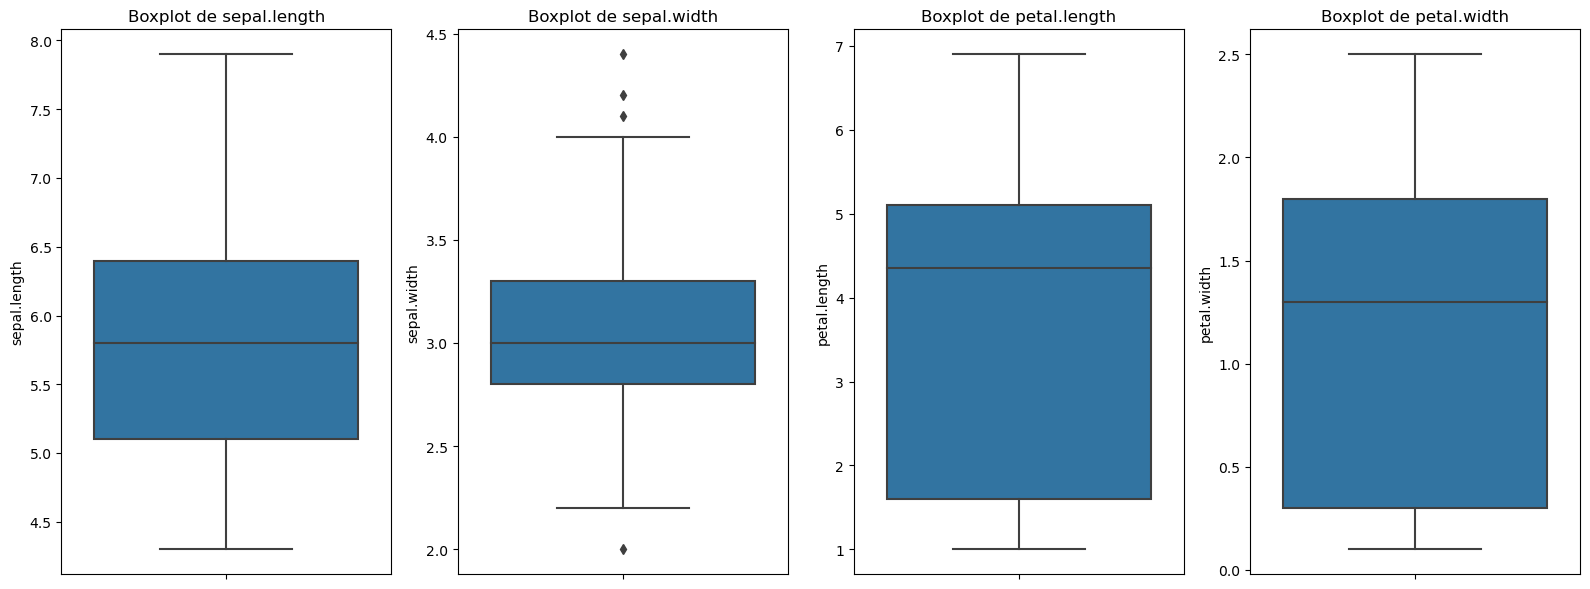

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 6))

for i, col in enumerate(iris.columns[:-1]) :
    seaborn.boxplot(data=iris, y=col, ax=axes[i])
    axes[i].set_title(f"Boxplot de {col}")
    
plt.tight_layout()
plt.show()

In [20]:
## Obtenir la moyenne des valeurs de chaque variable, selon le groupe :

grp = iris.groupby(by="variety", as_index=False)[["sepal.length", "sepal.width", "petal.length", "petal.width"]].agg("mean")
grp


,variety,sepal.length,sepal.width,petal.length,petal.width
0,Setosa,5.006,3.428,1.462,0.246
1,Versicolor,5.936,2.770,4.260,1.326
2,Virginica,6.588,2.974,5.552,2.026


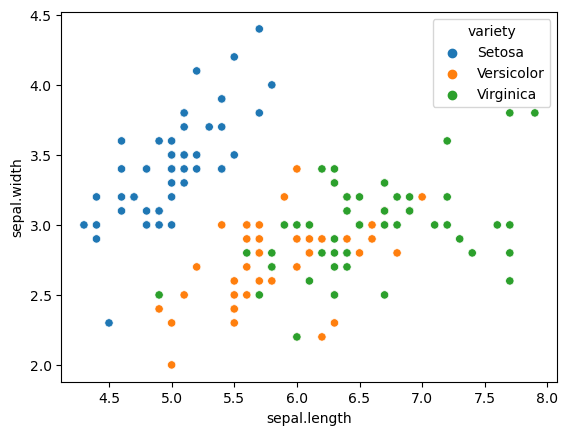

In [22]:
seaborn.scatterplot(data=iris, ## dataframe
                    x="sepal.length", ## nom de la colonne en x du df
                    y="sepal.width", ## nom de la colonne en y du df
                    hue="variety") ## nom de la colonne du df qui permet de catégoriser les points
plt.savefig(".\\RESULTATS\\iris_1.png") ## utiliser aussi .svg et ouvrir dans une application dédiée.

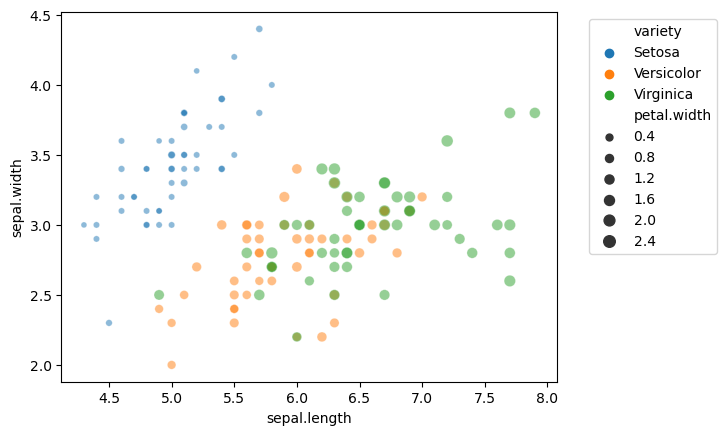

In [25]:
seaborn.scatterplot(data=iris, ## dataframe
                    x="sepal.length", ## nom de la colonne en x du df
                    y="sepal.width", ## nom de la colonne en y du df
                    size="petal.width",
                    alpha=0.5, ## transparence de 0% (0) à 100% (1).
                    hue="variety") ## nom de la colonne du df qui permet de catégoriser les points.
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left') ## Mettre la légende hors du graphique.
plt.savefig(".\\RESULTATS\\iris_2.png") ## utiliser aussi .svg et ouvrir dans une application dédiée.

In [39]:
## Créer un dataframe pour compter le nombre d'individus :

## remarque : on peut utiliser un countplot. Mais pour l'exemple, on va le faire à la main :


varietes = [ i for i in iris["variety"].unique() ]
quanti = list()

for i in varietes :
    d = iris[ iris["variety"] == i ] ## Sélection selon une condition, sur une colonne.
    
    nb = d.shape[0]
    
    quanti.append(nb)

nb_indiv = pandas.DataFrame(data=quanti, ## valeurs
                            index=varietes, ## les index
                            columns=["nb_indiv"]) ## nom de la colonne

nb_indiv

,nb_indiv
Setosa,50
Versicolor,50
Virginica,50


In [43]:
## Ensuite calculer le pourcentage d'individus :
nb_indiv["p"] = 0

## Vectorisation -> permet un calcul plus rapide.
def Pourcentage(r) :
    s = nb_indiv["nb_indiv"].sum()
    
    res = (r["nb_indiv"] / s) * 100
    
    return res

nb_indiv["p"] = nb_indiv.apply(func=Pourcentage, axis=1)

nb_indiv

,nb_indiv,p
Setosa,50,33.333333
Versicolor,50,33.333333
Virginica,50,33.333333


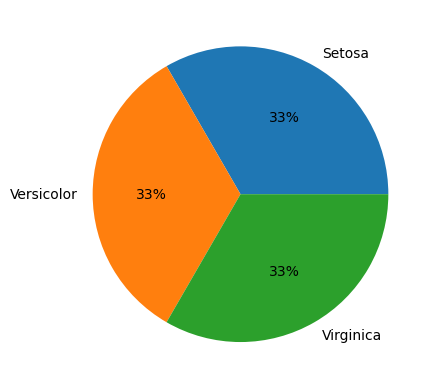

In [48]:
plt.pie(nb_indiv["p"], labels = nb_indiv.index, autopct='%.0f%%')
plt.show()

## Distribution et loi de probabilité

Importance : quand on travaille en stats, on travaille sur un échantillon représentatif de la population totale, tiré du hasard donc de probabilité. Les probabilités permettent de connaître le processus générateur des données sur lesquels on travaille.
On va voir les lois les plus connus.

In [ ]:
import numpy
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn

### La loi normale (distribution de gausse)

Continue, symétrique et forme en cloche.
Moyenne = 0 et symétrique autour de la moyenne.

trois caractéristiques :
- moyenne = 0, variance = 1,
- asymétrie = 0,
- applatissement = 3

Utilisé dans les algos paramétriques :
- analyses de résidus.
- Régression linéaire etc.

**Elle est donc fondamentale**.




### Loi du Khi2

: somme des k lois normales centrée-réduites au carré. 
Caractéristiques :
- Asymétrique.
- Prend que des valeurs positives.

Utilisée dans le test de khi2, dans le clustering [...], analyse de variance.




### Loi de Student

Forme de la loi normale.
Caractéristiques :
- queues de distribution plus épaisses.
- Loi normale / sqrt(loi khi2 / ddl)

Utilisée pour déterminer la pertinence de paramètres.




### Loi de Fischer

- Asymétrique,
- uniquement des valeurs positives.

Utilisée dans les tests d'hypothèses, dans la régression linéaire.



### Loi uniforme

Utilisée pour l'initialisation.
Probabilité égale dans les tirages.
Utilisée dans l'initialisation, dans la création de nombres alétoires etc.




### Loi de Poisson

Loi des évènements rares et indépendants.
Usages : nb défauts d'un appareil, modéliser des évènements rares (nb de pourboire etc).




### Loi exponentielle

Loi exponentielle, décrit le temps entre les évènements dans la loi de Poisson (ex: temps entre deux évènements rares, suivi, processus de renouvellement, auto-corrélation des séries temporelles).




### Loi de Bernouilli

Quand les résultats d'un test sont binaires. Ex: lancer une pièce, classification binaire etc.



### Loi binomiale

Répétition de loi de Bernouilli. En gros, on va répéter une expérience qui a deux sorties possibles.




### Loi multinomiale

On suit plusieurs évènements indépendants. Ex : modèle de régression logistique polynomiale etc.